In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

In [8]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [9]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [11]:
df.columns = ["admit","gre","gpa","Prestige"]
df.head()


,admit,gre,gpa,Prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
pd.crosstab(df["admit"],df["Prestige"],rownames = ["admit"])

Prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


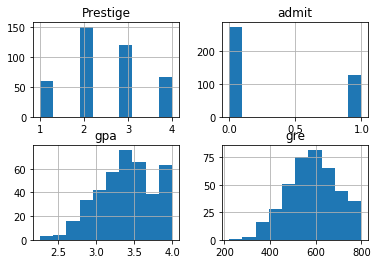

In [13]:
df.hist()
pl.show()


In [14]:
dummy= pd.get_dummies(df["Prestige"],prefix= "Prestige")

In [15]:
cols_to_keep =["admit","gre","gpa"]
data = df[cols_to_keep].join(dummy.loc[:,"Prestige_2":])
data.head()

,admit,gre,gpa,Prestige_2,Prestige_3,Prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [17]:
data["intercept"] = 2.0
data.head()

,admit,gre,gpa,Prestige_2,Prestige_3,Prestige_4,intercept
0,0,380,3.61,0,1,0,2.0
1,1,660,3.67,0,1,0,2.0
2,1,800,4.00,0,0,0,2.0
3,1,640,3.19,0,0,1,2.0
4,0,520,2.93,0,0,1,2.0


In [19]:
train_cols = data.columns[1:]

logit = sm.Logit(data["admit"],data[train_cols])

In [20]:

res= logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [23]:
a= res.predict([850,0,0,6,0,1.0])

In [24]:
print(a)

[0.00029999]


In [25]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                 0.08292
Time:                        20:55:34   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
Prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
Prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
Prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -1.9950      0.570     -3.500      0.000      -3.112      -0.878
==============================================================================
"""